# Least Squares  Polynomial Fitting (0.9 points)

## Introduction

As discussed during Week 2, one can use linear regression to fit a nonlinear function to data by employing a nonlinear embedding function $\phi: \Re^D \rightarrow \Re^K$. One can then express a nonlinear function  in terms of an inner product 
as follows:
$$f(\mathbf{x}) = \langle \mathbf{w}, \phi(\mathbf{x})\rangle $$

In this assignment we will consider the case of an embedding function that takes a point $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 \\ x \\ x^2 \\ \vdots\\ x^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$


If the quality of the approximation on a set of points is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


## Assignments

The function $\verb+pickle.load+$ loads the data set from the file $\verb+data_pol_fit.pkl+$, we then display the training and test sets. 

This notably provides you with a training set of input-output pairs $\mathcal{S} = \{(x_i,y_i)\}$ where $x_i \in \Re, y_i \in \Re, \quad i = 1\ldots 20$. 
Your task is to estimate a function $f:\Re\rightarrow \Re$ that can approximate the underlying input-output mapping well. 


1. (0.4) Find the optimal parameters $\mathbf{w}_0,\mathbf{w}_1,\ldots,\mathbf{w}_{10}$ if $f_K(x)$ is a polynomial of degree $0$ up to $10$, respectively. 
2. (0.1) Plot the estimated functions within the interval $[-1,1]$. 
3. (0.4) Plot  the value of the loss as a function of  the polynomial's order
 (a) on the training set and the (b) test set. Plot the two functions together. What do you observe? Do you have a possible interpretation of this result?

## Import test and training data from 1Ddata.mat

In [78]:
# Import all necessary module. If you get an error when executing
# this cell, then you are probably missing a module

import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [79]:
 
#x_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_train']
#x_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_test']
#y_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_train']
#y_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_test']

with open('data_pol_fit.pkl', 'rb') as handle:
        data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T
x_train.shape

(30, 1)

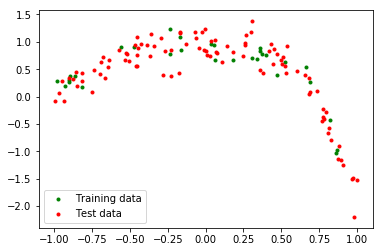

In [80]:
plt.figure()
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")
plt.legend()
plt.show()

In [81]:
x = [1, 2]
w = [1,0,-1]
y=np.zeros(len(x))
y[0] = w[0]*1+ w[1]*pow(x[0],1)+ w[2]*pow(x[0],2)
y[1] = w[0]*1+ w[1]*pow(x[1],1)+ w[2]*pow(x[1],2)
y

array([ 0., -3.])

## Define function poly 
Poly should take a vector value x and a K+1 dimensional vector w as arguments and return the value of the K-th order polynomial: 
$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$

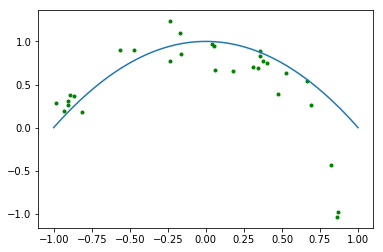

In [82]:
def poly(x, weight):    
    #########
    #define a zero-array of y with the same shape as x for the predict output given weight
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(w)):
            y[i] += w[j] * pow(x[i], j)
    #########
    return y
#type(y) - numpy.ndarray

# test if the function is correct
w=[1,0,-1]
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()
    


## Define embedding function

Now we need to define an embedding function that takes a point (or a vector of points) $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 & x & x^2 & \dots & x^K \end{array}\right]$$

K should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. That means, if we have N data samples $x_1,x_2,\dots,x_N$ and feed vector $\vec{x}=[x_1,x_2,\dots,x_N]^T$ to the function then the output should be the following array: 


$$\phi_K(\vec{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^K  
\end{array}\right]$$



 


In [83]:
# x should be a scalar or a vector of dimensions [n, 1]
def embedding_func(x,K):
    #########
    F = np.zeros((np.size(x), K+1))
    for i in range(np.size(x)):
        for j in range(K+1):
            F[i][j] = pow(x[i], j)
    ######### 
    return F

## if the function is correct, following should print [1 2 4 8 16; 1 3 9 27 81]
x = np.array([2, 3])
print(embedding_func(x,4))
        
    

[[  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]]


# Define function that fits K-th order polynomial and returns parameter w 

Input arguments for the function are [Nx1] vector y and [Nx1] vector x. Hint: In python 3.6 you can write A@B to do matrix multiplication instead of np.matmul(A,B).

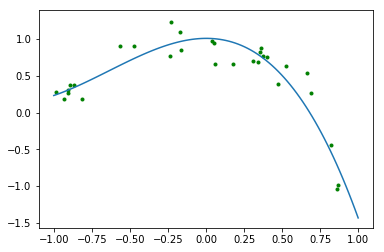

array([[ 1.00984503],
       [ 0.00721856],
       [-1.61041748],
       [-0.84011212]])

In [84]:
def estimate_w(y,X,K):
    #########
    # apply the defined function - "embedding_func" to get an embedding function 
    # that takes a point (or a vector of points)  x∈R to a K -dimensional space
    X = embedding_func(X,K)
    # apply the formula w = (X'*X)^(-1)X'y to get appropriate w
    w = np.linalg.inv(X.T@X)@X.T@y
    #########
    return w

w = estimate_w(y_train,x_train,3)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()
w

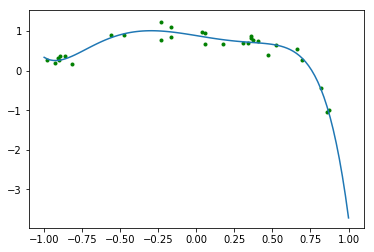

In [85]:
X = []
Y = []
for i in range(len(x_train)):
    X = np.append(X, x_train[i])
for j in range(len(y_train)):
    Y = np.append(Y, y_train[j])
    
w = np.polyfit(X,Y,7)[::-1]

x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)

plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()


# Fit 0-th to 10-th order polynomials to training data and plot resulting functions 




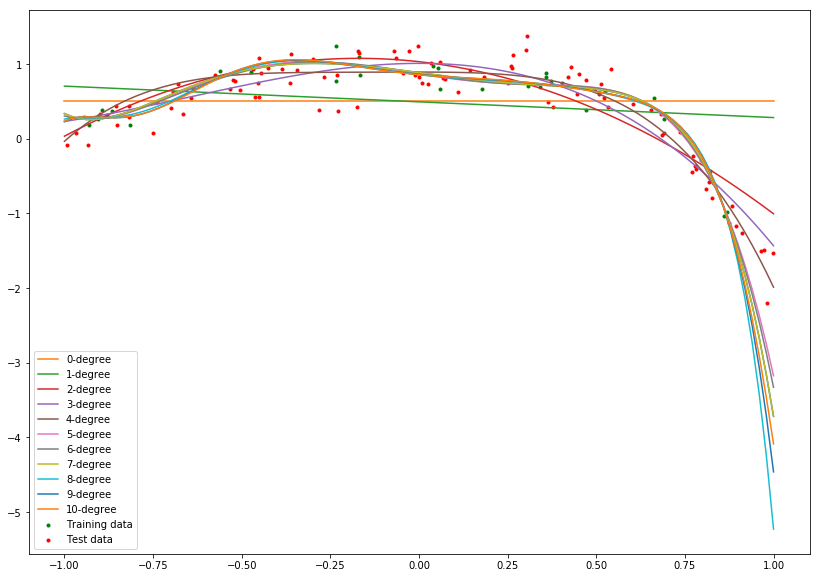

In [86]:
max_poly = 10

weights_store = list()

plt.figure(figsize=(14,10))
plt.plot(x,y)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")


for poly_degree in range(max_poly+1):
    #########
    w = estimate_w(y_train,x_train,poly_degree)
    x = np.linspace(-1.0,1.0, num=100, endpoint=True)
    y = poly(x, w)
    plt.plot(x,y,label ="%d-degree"%(poly_degree))
    #plt.legend("%d-degree"%(poly_degree))

    #########
    
plt.legend()
plt.show()



# Training and Testing Error

Calculate the training and the testing error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}

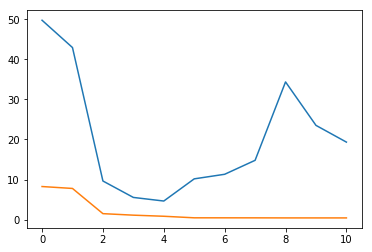

In [87]:
error_train = np.zeros(shape=(max_poly+1))
error_test  = np.zeros(shape=(max_poly+1))

#convert the both training and testing set of y into 1D array
#as the output of poly() function is 1D array
y_train = y_train.reshape(30,)
y_test = y_test.reshape(100,)

for poly_degree in range(max_poly+1):
    #########
    #estimate w according to the training dataset
    w= estimate_w(y_train,x_train,poly_degree)
    #use the estimated w to predict the corresponding values of y for both training and testing dataset
    y_train_pred = poly(x_train,w)
    y_test_pred = poly(x_test,w)

    #add up the errors to get the testing and training errors for each poly_degree
    '''for i in range(np.size(y_train)):
        error_train[poly_degree] += (y_train[i] - y_train_pred[i])**2
    for i in range(np.size(y_test)):
        error_test[poly_degree] += (y_test[i] - y_test_pred[i])**2
    '''
    error_train[poly_degree] = np.sum((y_train - y_train_pred)**2)
    error_test[poly_degree] = np.sum((y_test - y_test_pred)**2)

    #########

plt.figure()
plt.plot(error_test, label="Testing error")
plt.plot(error_train, label="Training error")
plt.show()  

#y_train.shape
#y_train_pred.shape

# 2. Linear versus logistic regression (0.7 points)}

The  file {week_1} contains code to compare the robustness of linear and logistic regression.
Linear regression has already been implemented for you. Please go through the relevant part of the code, and the relevant comments, before advancing to the remainder. 



As discussed in class, the loss function (or, criterion, $L$) driving logistic regression equals:

\begin{eqnarray}
L(\mathbf{w}) = -\sum_{i=1}^{N}\left[ y^i \log\left(g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)  + (1-y^i) \log\left(1-g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)\right].
\end{eqnarray}

Maximize this criterion for the provided dataset. Making reference to the slides of Week 3, this requires computing first and second order differentials, corresponding to $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$, respectively. 



1.  (.2/.7) Write the code to compute $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$. 

2. (.2/.7) Use these  to implement the Newton-Raphson algorithm.  Consider that convergence is achieved when $|w^{t} - w^{t-1}|_2<.001 |w^t|_2$

3. (.2/.7) Plot the loss function, $L(w)$, of Eq. 1 as a function of Newton-Raphson iteration.

4. (.1/.7) Compare the robustness of the fitted boundaries for the two experiments.

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data generation and visualization

In [189]:
def evaluate_linear_discriminant_on_grid(w_linear,loc_x,loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    [sz_m,sz_n] = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [180]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)
    
#data = scipy.io.loadmat('data.mat')  # Load MATLAB file.
test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

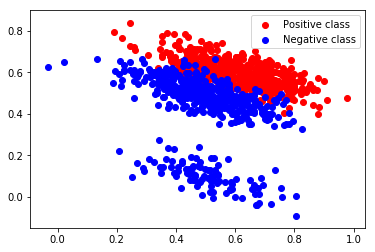

In [181]:
#display your data
pos=np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]
plt.scatter(train_features[0,pos],train_features[1,pos],c="r",label="Positive class")
plt.scatter(train_features[0,neg],train_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()

## Linear Regression (Done for you)

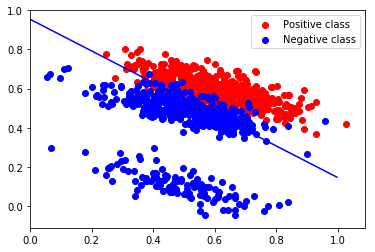

In [182]:
## Train a linear classifier

## in slide 31, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T;
Y = train_labels.T;

##  form X^T X
XX=np.dot(X.T, X)

##  form X^T Y
YX =np.dot(X.T,Y);

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w =np.dot(np.linalg.inv(XX),YX);


## visualize classifier
## step 1: get its value over a regular grid of positions
loc_x=np.arange(0,1.01,.01)
loc_y=np.arange(0,1.01,.01)
function_values,grid_x,grid_y=evaluate_linear_discriminant_on_grid(w,loc_x,loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values=[0.5,];
contPlt = plt.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
#plt.clabel(contPlt)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()


## Logistic regression

In [151]:
train_features.shape
len(train_features[1]) #dimension 3
len(train_features[0]) #no of features 1000
w=np.array([[0], [0], [0]]) #initialize w 
a=train_features.T@w
b=1.0/(1+np.exp(-a)) 
(b*(1-b)).shape
len(X)

1000

693.14718056
399.231242721
268.711582371
195.555205929
171.189582575
165.975867968
165.60042384
165.597687586


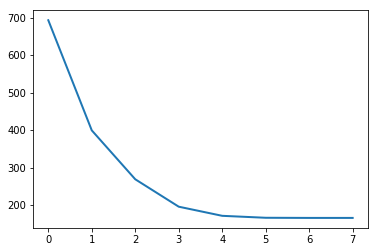

In [202]:
def sigmoid(x):  
    return 1.0/(1+np.exp(-x))  

def loss_func(x,y,w):
    g = sigmoid(x@w)
    loss = -np.sum(y*np.log(g)+(1-y)*np.log(1-g))
    return loss

def gradient_func(x,y,w):
    g = sigmoid(x@w)
    gradient = -x.T@(y-g)
    return gradient

def H_inv_func(x,y,w):
    g = sigmoid(x@w)
    R = np.eye(len(x))
    for i in range(len(x)):
        R[i,i]= (g[i]*(1-g[i]))
        H = x.T@R@x
        H_inv = np.linalg.inv(H)
    return H_inv

score=np.array([[]])
w=w_old=np.array([[0], [0], [0]]) #initialize w 
    
while np.linalg.norm(w-w_old, 2) >= 0.001*np.linalg.norm(w, 2): #continue until converge criterion is met
    #########
    loss=loss_func(X,Y,w)
    gradient=gradient_func(X,Y,w)
    H_inv=H_inv_func(X,Y,w)
    score = np.append(score,loss)
    w_old = w
    w = w_old - H_inv@gradient
    print (loss)

plt.plot(score, linewidth=2.0)
plt.show()   

693.14718056
399.231242721
268.711582371
195.555205929
171.189582575
165.975867968
165.60042384
165.597687586


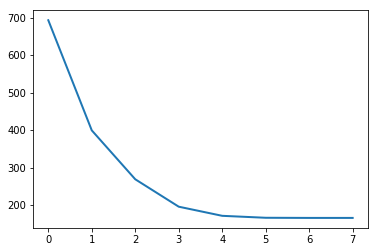

In [184]:
'''def sigmoid(x):  
    return 1.0/(1+np.exp(-x))  

def newton_method(x,y,w):
    score=np.array([[]])
    w=np.array([[0], [0], [0]]) #initialize w 
    w_old = w
    while np.linalg.norm(w-w_old, ord= 2) >= 0.001*np.linalg.norm(w,ord=2): #continue until converge criterion is met
    #########
        g = sigmoid(x@w)
        loss = -np.sum(y*np.log(g)+(1-y)*np.log(1-g))
        w_old = w
        gradient = -x.T@(y-g)
        R = np.eye(len(x))
        for i in range(len(x)):
            R[i,i]= (g[i]*(1-g[i]))
            H = x.T@R@x
            H_inv = np.linalg.inv(H)
            w = w_old-H_inv@gradient
            
        score = np.append(score,loss)
        print(loss)
    return score
    #########
score= newton_method(X,Y,w)
plt.plot(score, linewidth=2.0)
plt.show()
'''

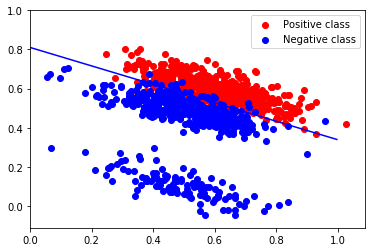

In [187]:
#########
loc_x=np.arange(0,1.01,.01)
loc_y=np.arange(0,1.01,.01)
function_values,grid_x,grid_y=evaluate_linear_discriminant_on_grid(w,loc_x,loc_y)

contour_values=[.5,];
contPlt = plt.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
#########

pos= np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()